In [111]:
#Import Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
#Create file paths for raw data
csv_path_clinical = os.path.join('raw_data', 'clinicaltrial_data.csv')
csv_path_mouse = os.path.join('raw_data', 'mouse_drug_data.csv')

# Read the CSV files into a Pandas DataFrame
mouse_trial_df = pd.read_csv(csv_path_mouse)
clinical_trial_df = pd.read_csv(csv_path_clinical)

#Merge the two dataframes and call the resulting df
combine_df = pd.merge(mouse_trial_df, clinical_trial_df, on="Mouse ID")
combine_df_2 = combine_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug"]]

combine_df_2.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


# Tumor Response to Treatment

In [113]:
#Tumor response to treatment

#Mean Tumor Volume by Drug name and Timepoint
combine_df_2.groupby("Drug")["Timepoint"].count()
tumor_response_df = combine_df_2.groupby(["Drug","Timepoint"])
tumor_response_2_df = tumor_response_df["Tumor Volume (mm3)"].mean().to_frame()
tumor_response_2_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [114]:
#Standard Error by Drug name and Timepoint
tumor_response_error = combine_df_2.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
tumor_response_error_2 = tumor_response_error.to_frame()
tumor_response_error_2.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [115]:
#Create dataframe that will be used for plot
tumor_plot_df = tumor_response_2_df.unstack(0)
tumor_plot_df_2 = tumor_plot_df["Tumor Volume (mm3)"]
tumor_plot_df_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Creating the plot to show how the tumor volume changes over time for each treatment

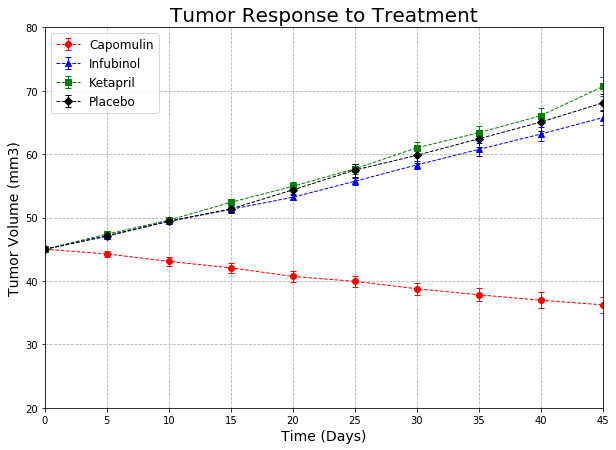

In [116]:
#Creating the Plot

#define x-axis
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

#Define each drug
error = tumor_response_error_2["Tumor Volume (mm3)"]["Capomulin"]
capomulin = plt.errorbar(x_axis, tumor_plot_df_2["Capomulin"], yerr=error, fmt="o", color="red", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tumor_response_error_2["Tumor Volume (mm3)"]["Infubinol"]
infubinol = plt.errorbar(x_axis, tumor_plot_df_2["Infubinol"], yerr=error, fmt="^", color="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tumor_response_error_2["Tumor Volume (mm3)"]["Ketapril"]
ketapril = plt.errorbar(x_axis, tumor_plot_df_2["Ketapril"], yerr=error, fmt="s", color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tumor_response_error_2["Tumor Volume (mm3)"]["Placebo"]
placebo = plt.errorbar(x_axis, tumor_plot_df_2["Placebo"], yerr=error, fmt="D", color="black", ls="dashed", linewidth=1, alpha=1, capsize=3)

#Axes limits
plt.ylim(20, 80)
plt.xlim(0, 45)

#Axes and Chart Labels
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.grid(linestyle="dashed")

#Chart Legend 
plt.legend((capomulin, infubinol, ketapril, placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

# Metastatic Response to Treatment

In [117]:
#Metastatic sites by Drug
combine_df_2.groupby("Drug")["Timepoint"].count()
metastatic_response_df = combine_df_2.groupby(["Drug", "Timepoint"])
metastatic_response_df_2 = metastatic_response_df["Metastatic Sites"].mean().to_frame()
metastatic_response_df_2.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [118]:
#Metastatic sites by Drug Standard Error

meta_response_error = combine_df_2.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
meta_response_error_2 = meta_response_error.to_frame()
meta_response_error_2.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [119]:
#Create dataframe that will be used for plot
meta_plot_df = metastatic_response_df_2.unstack(0)
meta_plot_df_2 = meta_plot_df["Metastatic Sites"]
meta_plot_df_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


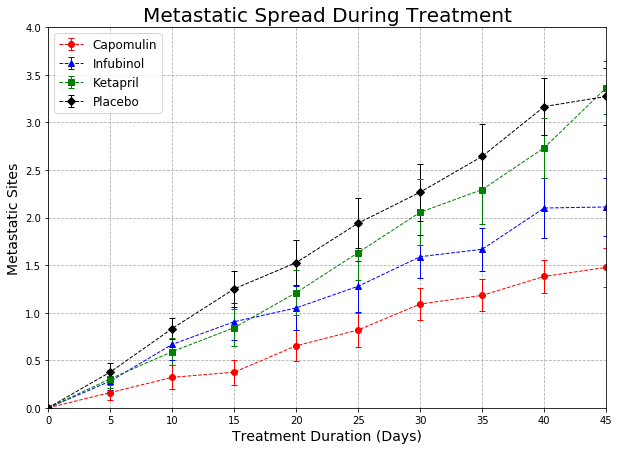

In [120]:
#Creating the Plot

plt.figure(figsize=(10,7))

#Define each drug
error2 = meta_response_error_2["Metastatic Sites"]["Capomulin"]
capomulin2 = plt.errorbar(x_axis, meta_plot_df_2["Capomulin"], yerr=error2, fmt="o", color="red", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = meta_response_error_2["Metastatic Sites"]["Infubinol"]
infubinol2 = plt.errorbar(x_axis, meta_plot_df_2["Infubinol"], yerr=error2, fmt="^", color="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = meta_response_error_2["Metastatic Sites"]["Ketapril"]
ketapril2 = plt.errorbar(x_axis, meta_plot_df_2["Ketapril"], yerr=error2, fmt="s", color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = meta_response_error_2["Metastatic Sites"]["Placebo"]
placebo2 = plt.errorbar(x_axis, meta_plot_df_2["Placebo"], yerr=error2, fmt="D", color="black", ls="dashed", linewidth=1, alpha=1, capsize=3)

#Axes limits
plt.ylim(0, 4)
plt.xlim(0, 45)

#Axes and Chart Labels
plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.ylabel("Metastatic Sites", fontsize=14)
plt.grid(linestyle="dashed")

#Chart Legend
plt.legend((capomulin2, infubinol2, ketapril2, placebo2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

# Survival Rates

In [121]:
#Count the number of unique mice
mice_count = combine_df_2.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
mice_count_2 = mice_count.to_frame()
mice_count_2 = mice_count_2.rename(columns={"Mouse ID": "Mouse Count"})
mice_count_2.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [122]:
#Create dataframe that will be used for plot
mice_plot = mice_count_2.unstack(0)
mice_plot_2 = mice_plot["Mouse Count"]
mice_plot_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


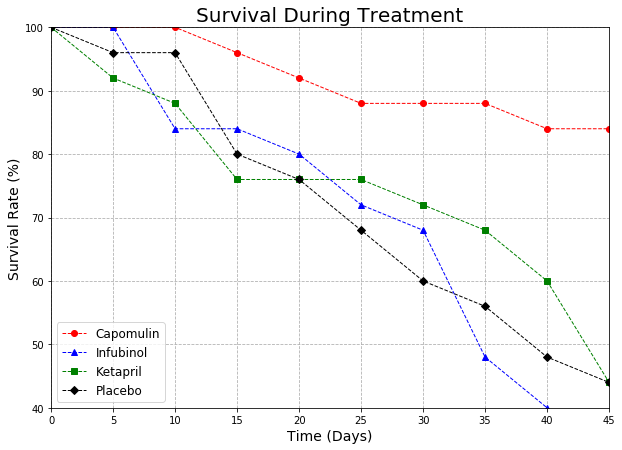

In [123]:
#Creating the Plot
plt.figure(figsize=(10,7))

#Mice Count per Drug
capomulin3 = plt.errorbar(x_axis, (mice_plot_2["Capomulin"]/25*100), fmt="o", color="red", ls="dashed", linewidth=1, alpha=1, capsize=3)
infubinol3 = plt.errorbar(x_axis, (mice_plot_2["Infubinol"]/25*100), fmt="^", color="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)
ketapril3 = plt.errorbar(x_axis, (mice_plot_2["Ketapril"]/25*100),  fmt="s", color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)
placebo3 = plt.errorbar(x_axis, (mice_plot_2["Placebo"]/25*100),  fmt="D", color="black", ls="dashed", linewidth=1, alpha=1, capsize=3)

#Axes Limits
plt.ylim(40, 100)
plt.xlim(0, 45)

#Axes and Chart Labels
plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)
plt.grid(linestyle="dashed")

#Chart Legend
plt.legend((capomulin3, infubinol3, ketapril3, placebo3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

# Summary Bar Graph

In [124]:
#Creating the summary table
summary_df=((tumor_plot_df_2.iloc[9,:]-tumor_plot_df_2.iloc[0,:])*100/tumor_plot_df_2.iloc[0,:]).to_frame()

# Renaming the column
summary_df_2=summary_df.rename(columns={0:"Percent Tumor Change"})

summary_df_2

,Percent Tumor Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


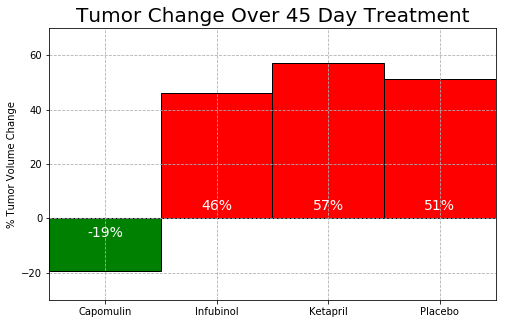

In [126]:
#Creating the final summary bar plot

plt.figure(figsize=(8,5))

#Graphing each drug
change_cap = plt.bar(0, summary_df_2["Percent Tumor Change"][0], color='green', alpha=1, align="edge", ec="black", width=1)
change_inf = plt.bar(1, summary_df_2["Percent Tumor Change"][2], color='red', alpha=1, align="edge", ec="black", width=1)
change_ket = plt.bar(2, summary_df_2["Percent Tumor Change"][3], color='red', alpha=1, align="edge", ec="black", width=1)
change_plac = plt.bar(3, summary_df_2["Percent Tumor Change"][5], color='red', alpha=1, align="edge", ec="black", width=1)

#Bar Height for Capomulin
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(change_cap)

#Bar Height for Infubinol, Ketapril, and Placebo
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(change_inf)
autolabel(change_ket)
autolabel(change_plac)

#Formatting
xvalues=["Capomulin", "Infubinol", "Ketapril", "Placebo"]
x_axis2 = np.arange(0,len(xvalues),1)
tick_locations = [value+0.5 for value in x_axis2]
plt.xticks(tick_locations, (xvalues))

#plt.xticks(tick_locations, summary_df_2.index.values, rotation="horizontal")
plt.grid(linestyle="dashed")

#Axes Limits
plt.xlim(0, 4)
plt.ylim(-30, 70)

#Axes and Chart Labels
plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")


plt.show()